# Calypso Data

In [1]:
# imports
import xarray
import pandas
import numpy as np

from matplotlib import pyplot as plt

# Load up the data

In [2]:
data = xarray.load_dataset('../../glider_gp/data/Calypso.nc')
data

<xarray.Dataset>
Dimensions:                       (profile: 3122, trajectory: 8, depth: 100)
Coordinates:
  * profile                       (profile) int32 0 1 2 3 ... 3119 3120 3121
  * depth                         (depth) int32 10 20 30 40 ... 970 980 990 1000
    lat                           (profile) float64 37.19 37.19 ... 36.94 36.94
    lon                           (profile) float64 -0.773 -0.7723 ... -0.8902
    time                          (profile) datetime64[ns] 2018-05-24T15:51:1...
Dimensions without coordinates: trajectory
Data variables:
    mission_name                  (trajectory) |S8 b'18505601' ... b'19305901'
    u_depth_mean                  (profile) float64 -0.1595 -0.1039 ... 0.06544
    v_depth_mean                  (profile) float64 0.2844 0.1659 ... -0.1685
    temperature                   (depth, profile) float64 18.86 18.87 ... nan
    salinity                      (depth, profile) float64 36.9 36.89 ... nan
    u                             (depth, profile) float64 -0.2138 ... nan
    v                             (depth, profile) float64 0.3052 0.2252 ... nan
    acoustic_backscatter_at_1MHz  (depth, profile) float64 68.79 72.7 ... nan
    mission                       (profile) int32 0 0 0 0 0 0 0 ... 7 7 7 7 7 7
    mission_profile               (profile) int32 1 2 3 4 5 ... 348 349 350 351
    trajectory_index              (profile) int32 0 0 0 0 0 0 0 ... 7 7 7 7 7 7
Attributes: (12/45)
    Conventions:                     CF-1.8, ACDD-1.3, Spray-0.1
    title:                           Observations of the Almeria-Oran front i...
    summary:                         Spray underwater gliders were used to ob...
    keywords:                        AUVS > Autonomous Underwater Vehicles, O...
    keywords_vocabulary:             GCMD Science Keywords
    featureType:                     trajectoryProfile
    ...                              ...
    contributor_role:                Principal Investigator, Data Curator
    product_version:                 v3
    instrument:                      Seabird SBE 41CP
    metadata_link:                   http://spraydata.ucsd.edu
    ctd_make_model:                  Seabird SBE 41CP
    doi:                             10.21238/S8SPRAY3700

## 2019 sprays

In [13]:
profiles_2019 =  []
profile_flags = []
for kk in range(2,8):
    #
    profile = data.trajectory_index.data == kk
    # Save
    profiles_2019.append(profile)
    # 400?
    flags = []
    for idx in np.where(profile)[0]:
        gd = np.isfinite(data.temperature.data[:, idx])
        imax = np.where(gd)[0][-1]
        #import pdb; pdb.set_trace()
        if imax > (400/10):
            flags.append(True)
        else:
            flags.append(False)
    profile_flags.append(flags)
#    
all_flags = np.concatenate(profile_flags)
all_2019 = np.concatenate(profiles_2019)
all_2019.shape

(18732,)

## Plot em all

## Space

### No flags

<Figure size 432x288 with 0 Axes>

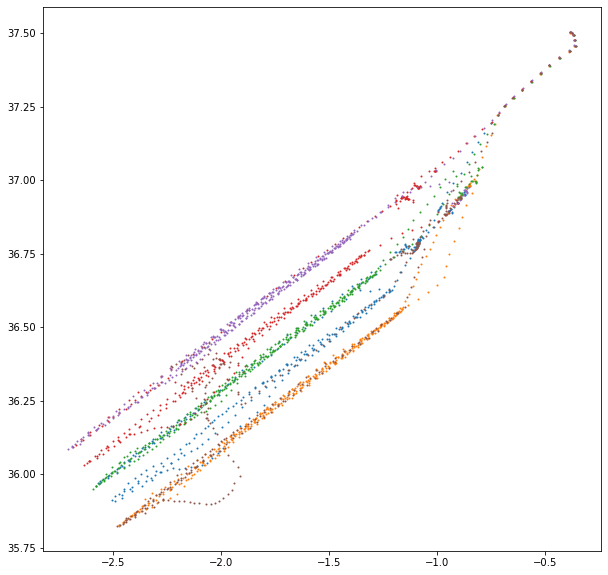

In [14]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
for profile, flags in zip(profiles_2019, profile_flags):
    lat0 = data.lat[profile]
    lon0 = data.lon[profile]
    ax.scatter(lon0, lat0, s=1)
#ax.scatter(lon1, lat1, s=1)
plt.show()

### Flags

<Figure size 432x288 with 0 Axes>

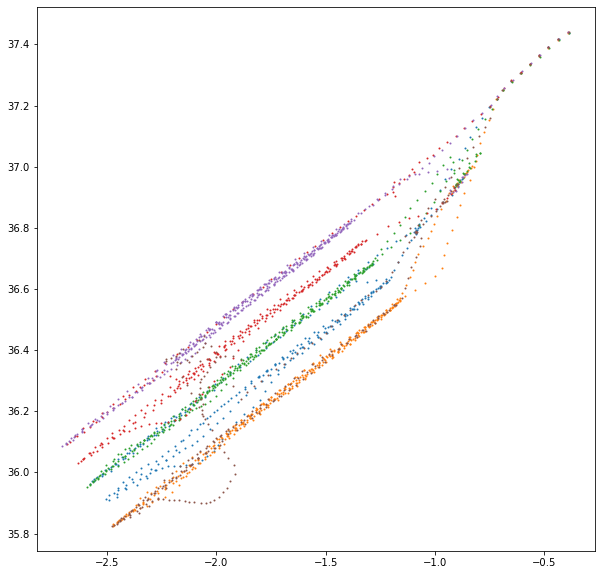

In [15]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
for profile, flags in zip(profiles_2019, profile_flags):
    lat0 = data.lat[profile][flags]
    lon0 = data.lon[profile][flags]
    ax.scatter(lon0, lat0, s=1)
#ax.scatter(lon1, lat1, s=1)
plt.show()

# Cut on depth

In [16]:
data.temperature[:,profiles_2019[0]].data[:,100]

array([15.8385    , 15.70145455, 15.56836364, 15.4418    , 15.26055556,
       14.59422222, 14.3929    , 14.2092    , 14.092875  , 13.96588889,
       13.790625  , 13.69144444, 13.62677778, 13.5578    , 13.49822222,
       13.46888889, 13.45788889, 13.45333333, 13.45422222, 13.45833333,
       13.46988889, 13.47611111, 13.46255556, 13.459     , 13.46344444,
       13.46925   , 13.47966667, 13.487875  , 13.49166667, 13.49566667,
       13.498     , 13.500375  , 13.49688889, 13.490625  , 13.48444444,
       13.472     , 13.47175   , 13.4665    , 13.458     , 13.449     ,
       13.444625  , 13.436125  , 13.43188889, 13.422     , 13.411     ,
       13.40877778, 13.405875  , 13.40475   , 13.40125   , 13.38322222,
       13.375125  , 13.3545    , 13.34675   , 13.33025   , 13.32325   ,
       13.317875  , 13.314     , 13.30711111, 13.30885714, 13.31      ,
       13.30575   , 13.290875  , 13.2855    , 13.276625  , 13.274875  ,
       13.27075   , 13.264875  , 13.257125  , 13.25525   , 13.25

IndexError: Boolean array size 3122 is used to index array with shape (100,).

<Figure size 432x288 with 0 Axes>

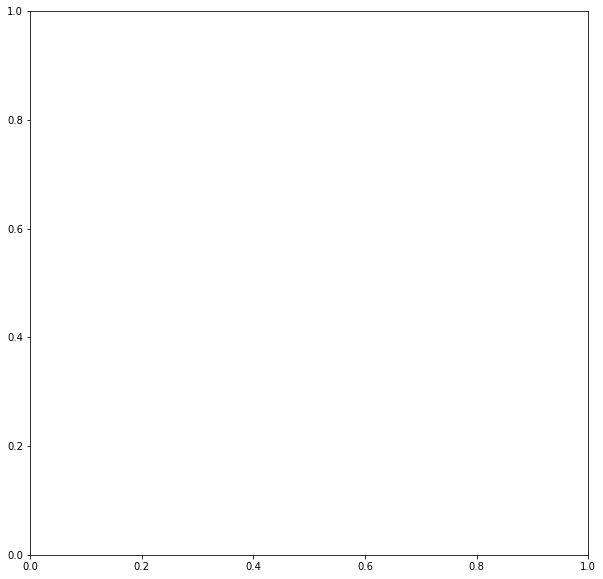

In [17]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
for profile in profiles_2019:
    lat0 = data.lat[profile]
    lon0 = data.lon[profile]
    depth = data.depth[profile]
    ax.scatter(lon0, depth, s=1)
#ax.scatter(lon1, lat1, s=1)
plt.show()

In [65]:
lat0 = data.lat[profile0]
lon0 = data.lon[profile0]

In [43]:
lat1 = data.lat[profile1]
lon1 = data.lon[profile1]

In [52]:
time0

,time
1,2018-05-24 16:39:52
1,2018-05-24 16:39:52
1,2018-05-24 16:39:52
1,2018-05-24 16:39:52
1,2018-05-24 16:39:52
...,...
0,2018-05-24 15:51:10
0,2018-05-24 15:51:10
0,2018-05-24 15:51:10
0,2018-05-24 15:51:10


## Plot

<Figure size 432x288 with 0 Axes>

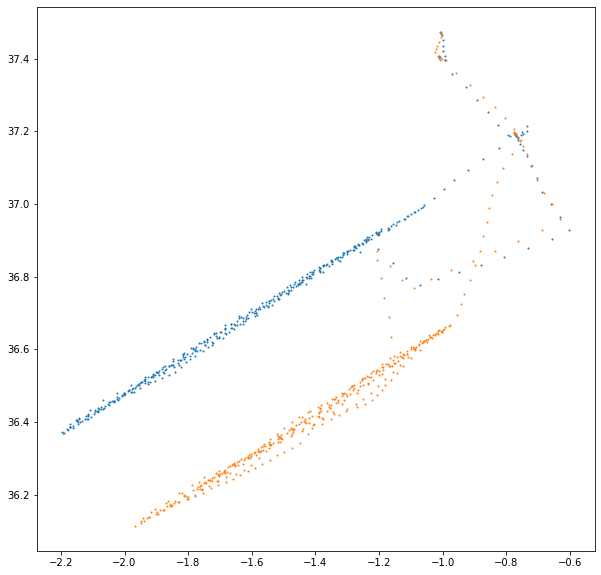

In [45]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
ax.scatter(lon0, lat0, s=1)
ax.scatter(lon1, lat1, s=1)
plt.show()

## Time

<Figure size 432x288 with 0 Axes>

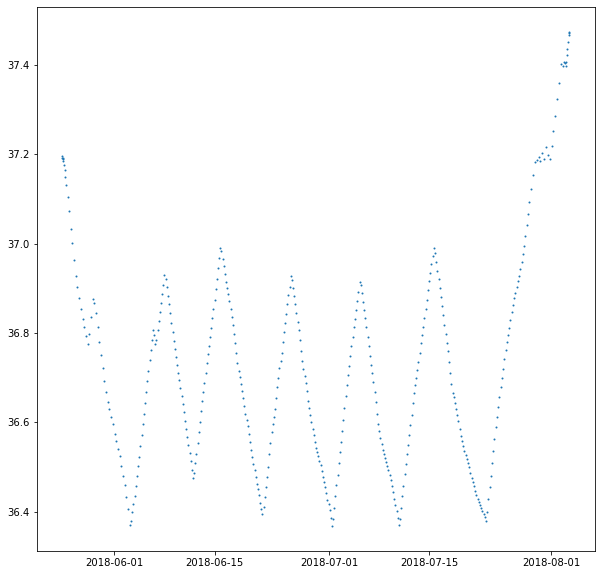

In [67]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
ax.scatter(time0, lat0, s=1)
#ax.scatter(lon1, lat1, s=1)
plt.show()

## Cut

In [88]:
cut0 = (lon0 < -1.) & (lat0 < 37.)
cut1 = (lon1 < -0.9) & (lat1 < 37.)
np.sum(cut0), np.sum(cut1)

(<xarray.DataArray ()>
 array(367),
 <xarray.DataArray ()>
 array(349))

<Figure size 432x288 with 0 Axes>

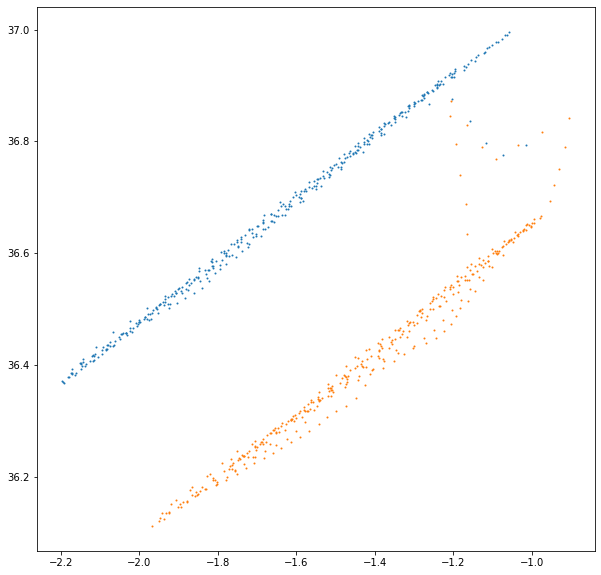

In [74]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
ax.scatter(lon0[cut0], lat0[cut0], s=1)
ax.scatter(lon1[cut1], lat1[cut1], s=1)
plt.show()

## Count in hours

In [81]:
t_from0 = time0 - time0[0]
thours = t_from0.astype(float) / (1e9*3600)
thours[0:5]

array([0.        , 0.81166667, 1.92416667, 3.14777778, 4.37194444])

In [87]:
dt = thours - np.roll(thours,1)
dt[0:20]

array([-1.70141444e+03,  8.11666667e-01,  1.11250000e+00,  1.22361111e+00,
        1.22416667e+00,  1.97472222e+00,  2.27500000e+00,  3.08138889e+00,
        3.34750000e+00,  4.20805556e+00,  4.42777778e+00,  5.49583333e+00,
        5.77555556e+00,  5.74333333e+00,  5.61861111e+00,  5.67500000e+00,
        5.72166667e+00,  5.74444444e+00,  5.68611111e+00,  5.64194444e+00])

## Temperature at 50m

In [89]:
temp0_50 = data.temperature.data[4, profile0]
temp0_50.shape

(419,)

<Figure size 432x288 with 0 Axes>

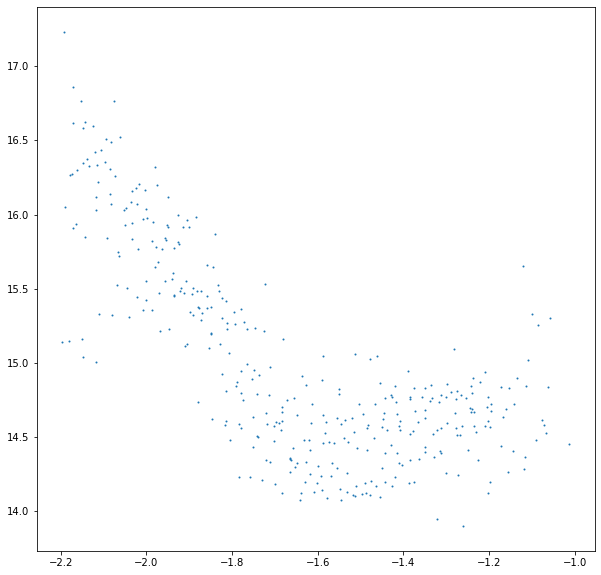

In [91]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
ax.scatter(lon0[cut0], temp0_50[cut0], s=1)
#ax.scatter(lon1[cut1], lat1[cut1], s=1)
plt.show()

<Figure size 432x288 with 0 Axes>

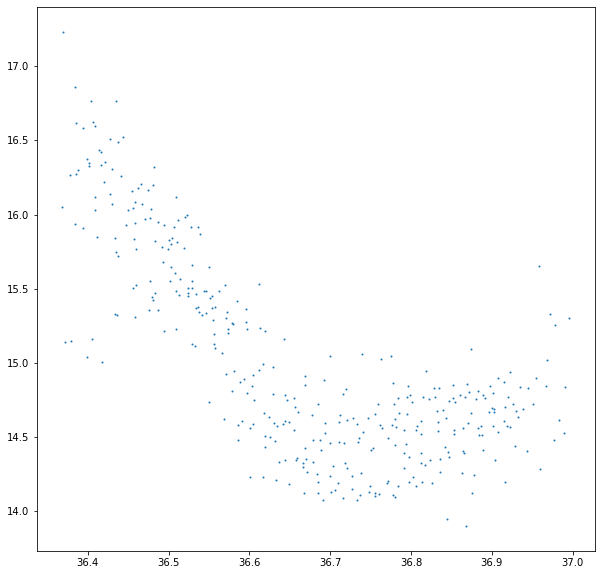

In [92]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
#
ax.scatter(lat0[cut0], temp0_50[cut0], s=1)
#ax.scatter(lon1[cut1], lat1[cut1], s=1)
plt.show()

In [93]:
data['temperature']

<xarray.DataArray 'temperature' (depth: 100, profile: 3122)>
array([[18.858375  , 18.86722222, 18.8139    , ..., 18.293     ,
        18.351     , 18.8405    ],
       [18.34822222, 18.20044444, 17.95422222, ..., 15.774     ,
        16.1998    , 17.16283333],
       [16.496125  , 16.641625  , 17.016375  , ..., 15.2445    ,
        15.5152    , 15.6058    ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 6 ... 3116 3117 3118 3119 3120 3121
  * depth    (depth) int32 10 20 30 40 50 60 70 ... 940 950 960 970 980 990 1000
    lat      (profile) float64 37.19 37.19 37.19 37.19 ... 36.94 36.94 36.94
    lon      (profile) float64 -0.773 -0.7723 -0.7727 ... -0.8902 -0.8902
    time     (profile) datetime64[ns] 2018-05-24T15:51:10 ... 2019-05-20T10:5...
Attributes:
    long_name:              Sea Water Temperature
    standard_name:          sea_water_temperature
    units:                  Celsius
    valid_max:              40.0
    valid_min:              -5.0
    coverage_content_type:  physicalMeasurement

In [97]:
np.argmin(np.abs(data.depth.data-50))

4

In [100]:
data.time[profile0].data - data.time[profile0].data[0]

array([               0,    2922000000000,    6927000000000,
         11332000000000,   15739000000000,   22848000000000,
         31038000000000,   42131000000000,   54182000000000,
         69331000000000,   85271000000000,  105056000000000,
        125848000000000,  146524000000000,  166751000000000,
        187181000000000,  207779000000000,  228459000000000,
        248929000000000,  269240000000000,  289205000000000,
        309275000000000,  329623000000000,  350009000000000,
        370768000000000,  391000000000000,  411597000000000,
        431931000000000,  452115000000000,  472699000000000,
        493124000000000,  513311000000000,  533764000000000,
        553858000000000,  574267000000000,  594758000000000,
        615741000000000,  636613000000000,  657085000000000,
        677524000000000,  697933000000000,  718624000000000,
        738954000000000,  758730000000000,  778816000000000,
        799067000000000,  819550000000000,  835196000000000,
        849088000000000,